In [1]:
import pandas as pd
import numpy as np

#0. `pandas` and preliminary knowledge

In this exercise we will be using the [`pandas`](https://pandas.pydata.org/docs/) library.

You can use a [cheat sheet of the basic functions](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) if you are not familiar with `pandas`.

`pandas` is a popular data manipulation library for Python. It provides data structures like Series and DataFrame alongside the essential functionality required for cleaning, aggregating, transforming, visualizing, and more tasks on data. `pandas` is built on top of the [`numpy`](https://numpy.org/) library, offering a higher-level, more intuitive interface for data analysis and manipulation. It's especially suitable for working with structured data, including datasets from Excel or CSV files, SQL tables, and more. With `pandas`, users can perform tasks like handling missing data, merging and joining datasets, filtering and reshaping data, and many other complex data operations. The extensive functionality of `pandas` makes it an essential tool for data scientists, analysts, and researchers working in Python.


# 1. Load the data
Find a way to load the data into a pandas dataframe. You can find the data here: https://osf.io/fv8c3.

You need to find a way to load this data. There is a function in `pandas` that can help you. If you can't find it on your own or you feel unsure, you can click [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) to find the correct function you can use.

In [2]:
df = pd.read_csv("https://drive.switch.ch/index.php/s/UEpTFv2Bfa5C1dd/download")
df.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


# 2. Clean the data
Here we use a very simple approach to clean the data. We remove all the rows that contain missing values. You can try a more sophisticated approach if you want.


In `pandas`, `NaN` (Not a Number) values represent missing or undefined data. `NaN` values can occur when loading datasets, during data manipulation, or when performing calculations. They are often used as a placeholder for missing or unrepresentable data.

Handling `NaN` values is essential as they can affect the results of data analysis and machine learning algorithms. Here are a few ways to handle `NaN` values in pandas:
- You can use the [`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) method to remove any rows or columns that contain NaN values from a DataFrame.
- You can use the [`fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) method to replace `NaN` values with a specific value or a method (like forward fill or backward fill).

For simplicity's sake we want to just remove all rows that have `NaN` values.

Look up how we could do backfill and forward fill and what doing that would mean in our case. Can you construct a case (on another dataset, or an imagined dataset) where filling is useful?

In [3]:
df = df.dropna()
df.shape
len(df)

115457

## A Note about `NaN` and `NaT`

Note that `NaN != NaN`!

You can find a detailed explanation of why this is the case [here](https://stackoverflow.com/a/1573715/5320601).

In short:

- `a == b` should hold if `(a - b) == 0`
- but then what is `(a - NaN)`?

The way to check for `NaN` values is to use [`.isna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html).

There is also [`NaT`](https://pandas.pydata.org/docs/reference/api/pandas.NaT.html), which is used for missing time values (like a datetime column), and [`NA`](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data-na) which is still experimental and whose behaviour could change without warning between versions of `pandas`.

In [4]:
a = np.nan
b = np.nan

a == b

False

And important to note, `NaN` is not the same as `None`!

In [5]:
print(f'{"NaN and None equality:":<30} {np.nan == None}')
print(f'{"None and None equality:":<30} {None == None}')
print(f'{"NaN and NaN equality:":<30} {np.nan == np.nan}')

NaN and None equality:         False
None and None equality:        True
NaN and NaN equality:          False


Keep in mind that this can behave unexpectedly if you are not aware of it.

Here we create a DataFrame with integers, and add a row with a missing value. For the missing value we use `None`.

In [6]:
_numbers = pd.DataFrame(
    [[0, 1, 2], [3, 4, 5]],
    columns=['a', 'b', 'c']
)
_numbers

,a,b,c
0,0,1,2
1,3,4,5


We see that this `None` becomes `NaN` in the DataFrame. That is because the dtype of the column is `float64` and `None` is not a number (`NaN`).

In [7]:
_numbers.loc[2] = [6, 7, None]
_numbers

,a,b,c
0,0.0,1.0,2.0
1,3.0,4.0,5.0
2,6.0,7.0,NaN


In [8]:
_numbers.dtypes

a    float64
b    float64
c    float64
dtype: object

When we do the same with strings though, this is different.

In [9]:
_strings = pd.DataFrame(
    [['Apple', 'red'], ['Banana', 'yellow']],
    columns=['Fruit', 'Color']
)
_strings

,Fruit,Color
0,Apple,red
1,Banana,yellow


In [10]:
_strings.loc[2] = ['Cherry', None]
_strings

,Fruit,Color
0,Apple,red
1,Banana,yellow
2,Cherry,None


In [11]:
_strings.dtypes

Fruit    object
Color    object
dtype: object

`None` can exist in an `object` type column. We don't expect only numbers in this case, so it is not converted.

# 3. Simple statistics
Calculate the mean, median, min and maximum values for all columns.

*Hint*: You can find this in the cheat sheet, in the section 'Summarize Data'.

If you already know how to do this the simple/automatic way, try to calculate these values by hand.

In [12]:
df.describe()
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns
df[numeric_columns].head()
df[numeric_columns].median()  # by default column-wise!

height          183.000000
weight           76.000000
games             1.000000
victories         1.000000
ties              0.000000
defeats           1.000000
goals             0.000000
yellowCards       0.000000
yellowReds        0.000000
redCards          0.000000
rater1            0.250000
rater2            0.250000
refNum         1579.000000
refCountry       15.000000
meanIAT           0.336628
nIAT           2882.000000
seIAT             0.000151
meanExp           0.356446
nExp           3011.000000
seExp             0.000586
dtype: float64

# 4. Average cards per game
Calculate the average number of yellow and red cards per game for each player.

Then print out the 5 players with the highest average number of cards per game.

## 4.1 Count the number of cards each player has gotten.
As an intermediate step, let's first calculate the number of cards each player has gotten.

*Hint*: You can access the yellow cards with `df['yellowCards']` and the red cards with `df['redCards']`. How can you calculate the sum of two integers? Can you apply your knowledge to working with DataFrames?

In [13]:
df['total_cards'] = df['yellowCards'] + df['redCards']
df['total_cards'].head()

0    0
1    1
5    0
6    0
7    0
Name: total_cards, dtype: int64

## 4.2 Calculate the average number of cards per game for each player.
Next, we can now use this column to calculate the average number of cards per game for each player.

*Hint*: If you don't know how to create new columns yet check the cheat sheet. Save the result of the previous task in a column, and then use that new column as a helper to calculate the average for each player.

In [14]:
df['avg_cards_per_game'] = df['total_cards'] / df['games']
df['avg_cards_per_game'].head()

0    0.0
1    1.0
5    0.0
6    0.0
7    0.0
Name: avg_cards_per_game, dtype: float64

## 4.3 Sort the players by the average number of cards per game.
Then we sort by this column.

*Hint*: Check the cheat sheet for how to sort!

In [15]:
avg_cards_per_game_df = df.sort_values(by='avg_cards_per_game', ascending=False)
avg_cards_per_game_df

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,total_cards,avg_cards_per_game
103688,jean-pascal-mignot,Jean-Pascal Mignot,AS Saint-Étienne,France,26.02.1981,183.0,75.0,Center Back,1,1,...,72,PRT,0.396803,1079.0,0.000392,0.790366,1121.0,0.001798,3,3.0
59371,barragan_3,Barragán,Valencia CF,Spain,12.06.1987,187.0,83.0,Right Fullback,1,0,...,44,ENGL,0.326690,44791.0,0.000010,0.356446,46916.0,0.000037,2,2.0
115519,ricardo-costa,Ricardo Costa,Valencia CF,Spain,16.05.1981,183.0,80.0,Center Back,1,0,...,7,FRA,0.334684,2882.0,0.000151,0.336101,3011.0,0.000586,2,2.0
83849,david-villa,David Villa,FC Barcelona,Spain,03.12.1981,175.0,69.0,Center Forward,1,0,...,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,2,2.0
68897,apono,Apoño,Real Zaragoza,Spain,13.02.1984,173.0,72.0,Defensive Midfielder,1,1,...,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56737,tolgay-arslan,Tolgay Arslan,Hamburger SV,Germany,16.08.1990,180.0,77.0,Attacking Midfielder,2,0,...,8,DEU,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225,0,0.0
56734,timo-hildebrand,Timo Hildebrand,FC Schalke 04,Germany,05.04.1979,186.0,80.0,Goalkeeper,1,0,...,8,DEU,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225,0,0.0
56732,timmy-simons,Timmy Simons,1. FC Nürnberg,Germany,11.12.1976,186.0,79.0,Defensive Midfielder,8,6,...,8,DEU,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225,0,0.0
56726,thomas-kleine,Thomas Kleine,SpVgg Greuther Fürth,Germany,28.12.1977,191.0,82.0,Center Back,8,6,...,8,DEU,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225,0,0.0


## 4.4 Print out the top 5 players.
This is now very easy to do. We will not use `.head()` this time though.

*Hint*: How would you solve this if you were working with a sorted list?

In [16]:
avg_cards_per_game_df[:5]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,total_cards,avg_cards_per_game
103688,jean-pascal-mignot,Jean-Pascal Mignot,AS Saint-Étienne,France,26.02.1981,183.0,75.0,Center Back,1,1,...,72,PRT,0.396803,1079.0,0.000392,0.790366,1121.0,0.001798,3,3.0
59371,barragan_3,Barragán,Valencia CF,Spain,12.06.1987,187.0,83.0,Right Fullback,1,0,...,44,ENGL,0.326690,44791.0,0.000010,0.356446,46916.0,0.000037,2,2.0
115519,ricardo-costa,Ricardo Costa,Valencia CF,Spain,16.05.1981,183.0,80.0,Center Back,1,0,...,7,FRA,0.334684,2882.0,0.000151,0.336101,3011.0,0.000586,2,2.0
83849,david-villa,David Villa,FC Barcelona,Spain,03.12.1981,175.0,69.0,Center Forward,1,0,...,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,2,2.0
68897,apono,Apoño,Real Zaragoza,Spain,13.02.1984,173.0,72.0,Defensive Midfielder,1,1,...,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,2,2.0


# 5. Average number of cards per country
Do the same as in task 4. but this time for each country. This means we need to group the countries!

## 5.1 Group the data by country.

*Hint*: Check the cheat sheet for grouping!

In [59]:
avg_cards_per_game_df.iloc[:1, 3]

103688    France
Name: leagueCountry, dtype: object

In [18]:
grouped_by_country = df.groupby('leagueCountry')
grouped_by_country.groups.keys()

dict_keys(['England', 'France', 'Germany', 'Spain'])

## 5.2 Calculate the average number of cards per game for each country.

*Hint*: Remember how you calculated the average number of cards per game for each player! It's not exactly the same here but similar.

In [19]:
(grouped_by_country['yellowCards'].sum() + grouped_by_country['yellowReds'].sum() + grouped_by_country['redCards'].sum()) / grouped_by_country['games'].sum()

leagueCountry
England    0.118036
France     0.136208
Germany    0.131995
Spain      0.182362
dtype: float64

In [20]:
(grouped_by_country['yellowCards'].sum() + grouped_by_country['redCards'].sum()) / grouped_by_country['games'].sum()

leagueCountry
England    0.115345
France     0.132275
Germany    0.128539
Spain      0.176037
dtype: float64

# 6. Correlation
Let's calculate some correlations.

*Hint*: You can use [this](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) function if you don't know or can't find out how to do it.

*Hint*: To select numeric columns, you can use `numeric_columns = df.select_dtypes(include=[np.number]).columns`.

In [21]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns].corr #alle Spalten die eine Zahl sind

<bound method DataFrame.corr of         height  weight  games  victories  ties  defeats  goals  yellowCards  \
0        177.0    72.0      1          0     0        1      0            0   
1        179.0    82.0      1          0     0        1      0            1   
5        182.0    71.0      1          0     0        1      0            0   
6        187.0    80.0      1          1     0        0      0            0   
7        180.0    68.0      1          0     0        1      0            0   
...        ...     ...    ...        ...   ...      ...    ...          ...   
146022   188.0    80.0      1          0     1        0      0            0   
146023   178.0    67.0      1          1     0        0      1            0   
146024   190.0    87.0      1          0     0        1      0            0   
146025   169.0    72.0      1          1     0        0      0            0   
146027   174.0    72.0      1          0     0        1      0            0   

        yellowReds 

In [22]:
correlation = df['height'].corr(df['yellowCards'])
correlation

-0.041325795440141685

In [23]:
df[numeric_columns]

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,...,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,total_cards,avg_cards_per_game
0,177.0,72.0,1,0,0,1,0,0,0,0,...,1,1,0.326391,712.0,0.000564,0.396000,750.0,0.002696,0,0.0
1,179.0,82.0,1,0,0,1,0,1,0,0,...,2,2,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,1,1.0
5,182.0,71.0,1,0,0,1,0,0,0,0,...,4,4,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0,0.0
6,187.0,80.0,1,1,0,0,0,0,0,0,...,4,4,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0,0.0
7,180.0,68.0,1,0,0,1,0,0,0,0,...,4,4,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146022,188.0,80.0,1,0,1,0,0,0,0,0,...,3147,21,0.376127,574.0,0.000714,0.498350,606.0,0.002968,0,0.0
146023,178.0,67.0,1,1,0,0,1,0,0,0,...,3147,21,0.376127,574.0,0.000714,0.498350,606.0,0.002968,0,0.0
146024,190.0,87.0,1,0,0,1,0,0,0,0,...,3147,21,0.376127,574.0,0.000714,0.498350,606.0,0.002968,0,0.0
146025,169.0,72.0,1,1,0,0,0,0,0,0,...,3147,21,0.376127,574.0,0.000714,0.498350,606.0,0.002968,0,0.0


## 6.1 Highest correlations per variable
For each of the variables, let's find the variable that has the highest correlation with it.

*Hint*: Break this down into multiple smaller problems!
- How can you calculate the correlations? (You have done this already!)
- How can you iterate over the columns?
- How can you select each column to get the correlations?
- How can you sort the correlation values?
- How can you find the highest correlation value?

In [27]:
c = df[numeric_columns].corr().replace(1.0, np.nan) #Correlation mit sich selbst ist immer 1, daher kann man diese eigentlich überschreiben
cdf = pd.DataFrame(
    {
        "other": c.idxmax(),
        "correlation":c.max()
    }
)

cdf.sort_values("correlation", ascending=False)


,other,correlation
nExp,nIAT,0.999997
nIAT,nExp,0.999997
total_cards,yellowCards,0.990975
yellowCards,total_cards,0.990975
rater2,rater1,0.921823
rater1,rater2,0.921823
seExp,seIAT,0.914039
seIAT,seExp,0.914039
games,victories,0.855858
victories,games,0.855858


In [29]:
c.idxmax()

height                     weight
weight                     height
games                   victories
victories                   games
ties                        games
defeats                     games
goals                   victories
yellowCards           total_cards
yellowReds                  games
redCards              total_cards
rater1                     rater2
rater2                     rater1
refNum                 refCountry
refCountry                meanExp
meanIAT                   meanExp
nIAT                         nExp
seIAT                       seExp
meanExp                   meanIAT
nExp                         nIAT
seExp                       seIAT
total_cards           yellowCards
avg_cards_per_game    total_cards
dtype: object

In [52]:
# df[numeric_columns].corr().replace(1.0, np.nan).sort_values("height", ascending=False)
corrs = df[numeric_columns].corr()

for collumn in numeric_columns:
    high_corrs = corrs[collumn].sort_values(ascending=False)[1:1+3] 
    for index, corr in high_corrs.items():  
        print(collumn, index, corr)

height weight 0.7914972050607055
height refNum 0.021218339014344997
height redCards 0.007067698331657767
weight height 0.7914972050607055
weight refNum 0.021946797189410273
weight redCards 0.008351654720998093
games victories 0.8558576680313157
games defeats 0.7812185900320455
games ties 0.7607619655309061
victories games 0.8558576680313157
victories total_cards 0.486108411739537
victories yellowCards 0.4838370159404876
ties games 0.7607619655309061
ties victories 0.4827941712009512
ties defeats 0.480232725359787
defeats games 0.7812185900320455
defeats ties 0.480232725359787
defeats total_cards 0.4771447031167401
goals victories 0.45367403814587337
goals games 0.43522566040593835
goals ties 0.2883509168522429
yellowCards total_cards 0.9909749028272088
yellowCards games 0.5833219742561198
yellowCards avg_cards_per_game 0.5485670558106073
yellowReds games 0.114160780029708
yellowReds total_cards 0.10648006818781215
yellowReds yellowCards 0.1062302876281908
redCards total_cards 0.2191211

## 6.2 Interesting correlations
Pick out some correlations and explain why you think they are interesting and what might be the cause of them.

# 7. Simple Analysis
Let's do a simple analysis of skin color and the average number of cards. For this we are going to use a boxplot.

Here is an example boxplot. You can adjust the code in the cell below to solve this task. You need to modify the code a bit to use the actual data from the DataFrame.

![](https://www.simplypsychology.org/wp-content/uploads/box-whisker-plot.jpg)

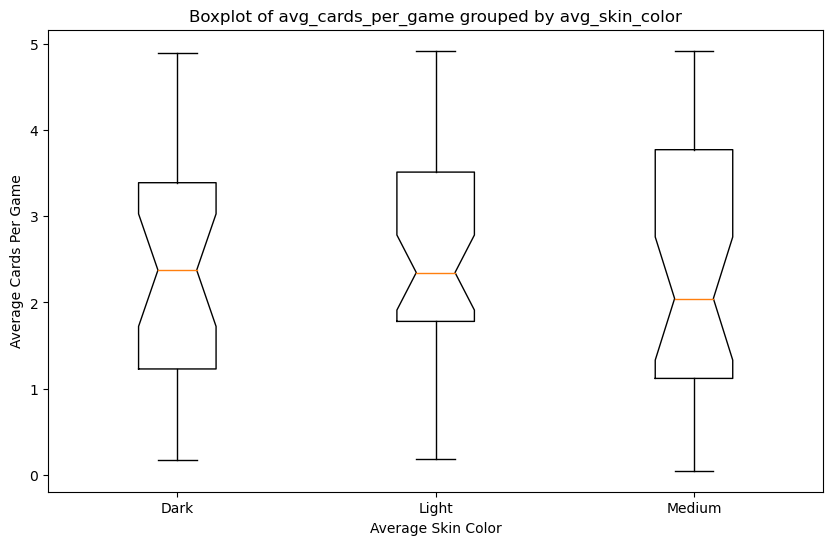

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate example data
np.random.seed(0)
avg_skin_color = np.random.choice(['Light', 'Medium', 'Dark'], 100)
avg_cards_per_game = np.random.rand(100) * 5  # random values between 0 and 5

# Create a DataFrame
boxplot_values = pd.DataFrame({
    'avg_skin_color': avg_skin_color,
    'avg_cards_per_game': avg_cards_per_game
})

# Grouping and preparing data for boxplot
grouped = boxplot_values.groupby('avg_skin_color')['avg_cards_per_game']

labels = sorted(boxplot_values['avg_skin_color'].unique())

data_for_boxplot = [grouped.get_group(label).values for label in labels]

# Plotting the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_boxplot, labels=labels, notch=True)
plt.title('Boxplot of avg_cards_per_game grouped by avg_skin_color')
plt.xlabel('Average Skin Color')
plt.ylabel('Average Cards Per Game')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate example data
np.random.seed(0)

grouped_by_country = df.groupby('leagueCountry')

avg_skin_color = df.groupby('')
avg_cards_per_game = np.random.rand(100) * 5  # random values between 0 and 5

# Create a DataFrame
boxplot_values = pd.DataFrame({
    'avg_skin_color': avg_skin_color,
    'avg_cards_per_game': avg_cards_per_game
})

# Grouping and preparing data for boxplot
grouped = boxplot_values.groupby('avg_skin_color')['avg_cards_per_game']

labels = sorted(boxplot_values['avg_skin_color'].unique())

data_for_boxplot = [grouped.get_group(label).values for label in labels]

# Plotting the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_for_boxplot, labels=labels, notch=True)
plt.title('Boxplot of avg_cards_per_game grouped by avg_skin_color')
plt.xlabel('Average Skin Color')
plt.ylabel('Average Cards Per Game')
plt.show()